## 확률변수의 기댓값

확률변수를 이용한 데이터분석에서 가장 중요한 것은 다음과 같다.

> 데이터를 사용하여 해당 확률변수의 확률분포함수의 모양을 결정한다.

즉, 우리에게 주어진 데이터를 이용해 가상의 수학 세계에 있는 우리에게 데이터를 준 **확률변수의 확률분포함수를 추정**하는 것이다.

어떤 과정을 거쳐 확률변수의 확률분포함수를 알게 되었다고 가정하자.

그렇다면 우리는 가상의 수학 세계에 있는 확률변수의 이론적인 평균값을 구할 수 있다.

이 이론적인 평균값을 **기댓값(expectation)**, 또는 **평균**이라고 한다.

확률 변수 $X$의 기댓값은 $E[X]$ 또는 $\mu$로 표기한다.

**이산확률변수**의 경우 기댓값은 표본공간의 원소 $x_i$의 가중합으로 구할 수 있다.

\begin{align}
\mu_X = \text{E}[X] = \sum_{x_i \in \Omega} x_ip(x_i) 
\end{align}

여기서 가중치가 되는 값은 원소 $x_i$의 확률값(확률질량함수)이 된다.

**연속확률변수**의 경우 기댓값은 확률밀도함수 $p(x)$를 가중치로 모든 가능한 표본 $x$를 적분한 값이다.

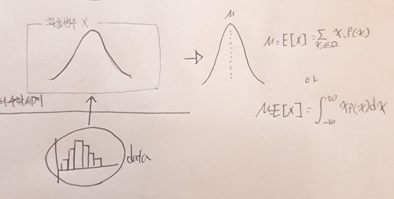

\begin{align}
\mu_X = \text{E}[X] = \int_{-\infty}^{\infty} x p(x) dx 
\end{align}

ex) 주사위를 대표하는 확률변수 $X$의 기댓값

In [22]:
x = np.array([[1], [2], [3], [4], [5], [6]])
w = np.array([[1/6], [1/6], [1/6], [1/6], [1/6], [1/6]])

x.T @ w

array([[3.5]])

각 원소에 대해 확률값을 곱한 가중합을 구한 결과 주사위의 기댓값은 3.5이다.

만약 짝수가 나올 확률이 두배인 경우 기댓값은

In [26]:
# x = np.array([[1], [2], [3], [4], [5], [6]])
w = np.array([[1/9], [2/9], [1/9], [2/9], [1/9], [2/9]])

x.T @ w

array([[3.66666667]])

이다.

> 표본평균을 $\bar{x}$ 구할 때 확률값을 곱하지 않는 이유는 표본평균이라 함은 이미 가상의 수학세계에 존재하는 확률변수 $X$에서 샘플링 된 표본에 대해 평균을 구하는 것이다. 하지만 기댓값의 경우 선택된 표본이 아니기에 선택될 빈도를 확률로 가정하여 이를 가중치로 곱한 것이기 때문이다.

> **기댓값**은 가능한 $x$값을 확률값으로 가중합한 것으로 확률이 가장 높은 $x$값 근처의 값이 된다는 특징이 있다. 즉, **확률밀도가 모여있는 곳의 위치**가 된다.

In [32]:
x = np.array([[75], [80], [85], [90], [95], [100]])
w = np.array([[1/10], [2/10], [3/10], [2/10], [1/10], [1/10]])

x.T @ w

array([[86.5]])

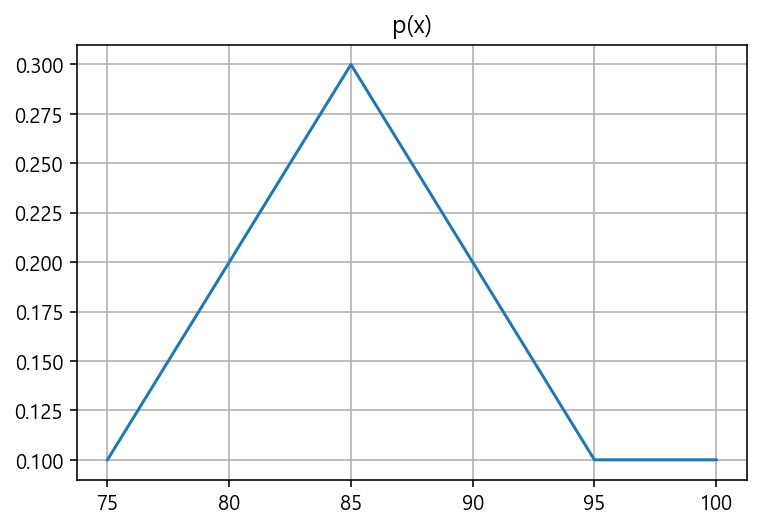

In [40]:
plt.plot(x, w)
plt.title('p(x)')
plt.grid()

## 확률변수의 변환

우리에게 $\{x_i\}$라는 데이터가 주어졌을 때 이 데이터를 만들어내는 확률변수가 $X$라고 가정하자.

이 데이터를 어떤 함수 $f$를 이용해 $f(x_i)$ 로 만들면 출력값은 새로운 데이터 집합이 된다.

이 데이터 집합을 $\{y_i\}$라고 하면 이 새로운 데이터 집합은 기존의 데이터집합과는 완전히 다른 새로운 데이터가 된다.

따라서 데이터 집합 $\{y_i\}$를 만들어내는 새로운 확률변수 $Y$가 생기는 것이라고 볼 수 있다.

> 이렇게 기존의 확률변수를 이용해 새로운 확률변수를 만드는 것을 확률변수의 변환이라한다.

$$Y = f(X)$$

아래의 예시는 확률 변수 $X$가 주사위를 던져 나오는 수를 나타내는 확률변수라 가장하고 $Y$는 주사위를 던져 나오는 수에 두배를 한 수를 나타내는 확률변수이다.

이 확률변수들의 확률질량함수를 시각화하면 다음과 같다.

<BarContainer object of 6 artists>

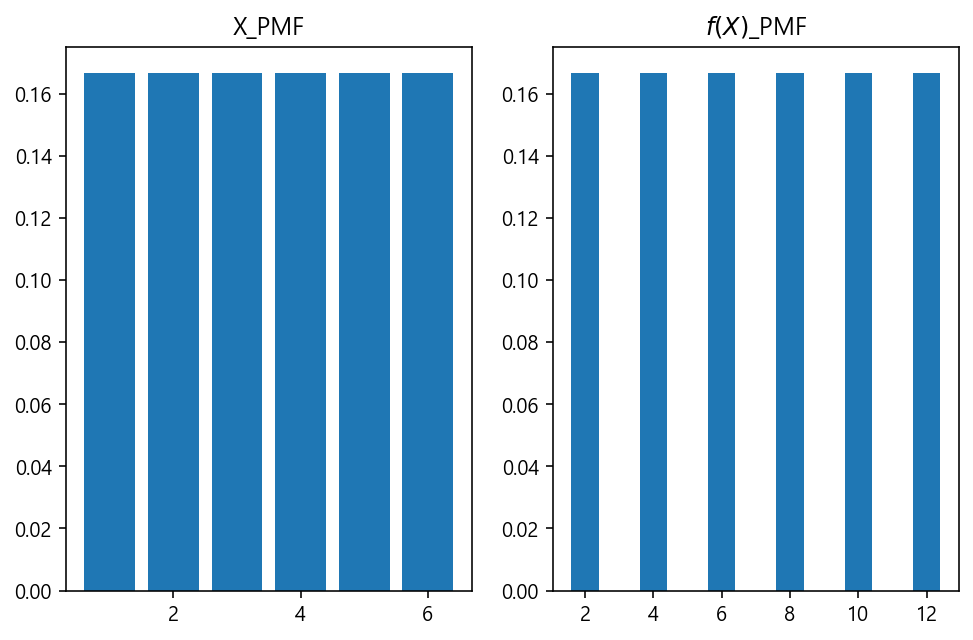

In [57]:
x = np.arange(1, 7)
y = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

def f(x):
    return x*2

plt.figure(figsize=(8, 5))
plt.subplot(121)
plt.title('X_PMF')
plt.bar(x, y)

plt.subplot(122)
plt.title('$f(X)$_PMF')
plt.bar(f(x), y)

## 기댓값과 표본평균의 관계

기댓값과 표본평균의 관계를 설명하기 전 아래의 식에서 $X_i$는 확률변수 $X$의 복사본이라는 것을 기억하자.

\begin{align}
\bar{X} = \dfrac{1}{N}\sum_{i=1}^{N} X_i
\end{align}

즉, 표본평균은 $N$개의 확률변수 복사본을 이용해 샘플링된 표본값을 $N$으로 나눈 값이다.

따라서 표본평균도 평균값을 출력하는 확률변수이며 기댓값이 존재하며 원래의 확률변수의 기댓값과 표본평균의 기댓값은 같다는 것을 증명할 수 있다.

$E[\bar{X}] = E[X]$

---

증명

\begin{split} 
\begin{align}
\begin{aligned}
\text{E}[\bar{X}] 
&= \text{E}\left[\dfrac{1}{N}\sum_{i=1}^{N}X_i \right]  \\
&= \dfrac{1}{N}\sum_{i=1}^{N}\text{E}[X_i]  \\
&= \dfrac{1}{N}\sum_{i=1}^{N}\text{E}[X] \\
&= \dfrac{1}{N} N \text{E}[X] \\ 
&= \text{E}[X]  \\
\end{aligned}
\end{align}
\end{split}

$X_i$가 $X$가 되는 이유는 복사본이기에 바뀌는 것이다.

이 식이 의미하는 것은 다음과 같다.

>표본평균의 기댓값은 확률변수 $X$의 기댓값 근처의 값이 된다.

In [108]:
# 주사위 100번 던진 값의 평균
np.mean(np.random.randint(1, 7, 100))

3.68

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '표본평균의 기댓값은 확률변수 $X$의 기댓값 근처')

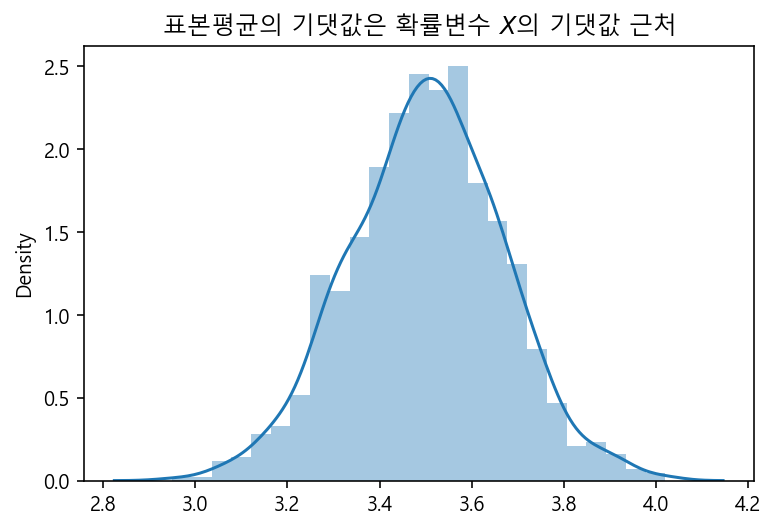

In [127]:
result = []
for i in range(1000):
    result.append(np.mean(np.random.randint(1, 7, 100)))
    
sns.distplot(result)
plt.title('표본평균의 기댓값은 확률변수 $X$의 기댓값 근처')

## 중앙값

In [131]:
# 기댓값이 1이고 표준편차가 2인 정규분포 객체 생성

import scipy as sp
rv = sp.stats.norm(loc=1, scale=2)

확률변수의 중앙값은 중앙값보다 큰 값이 나올 확률과 작은 값이 나올 확률이 0.5로 같은 값이다. 

확률밀도함수에서의 중앙값은 면적이 0.5가 되는 지점이다.

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


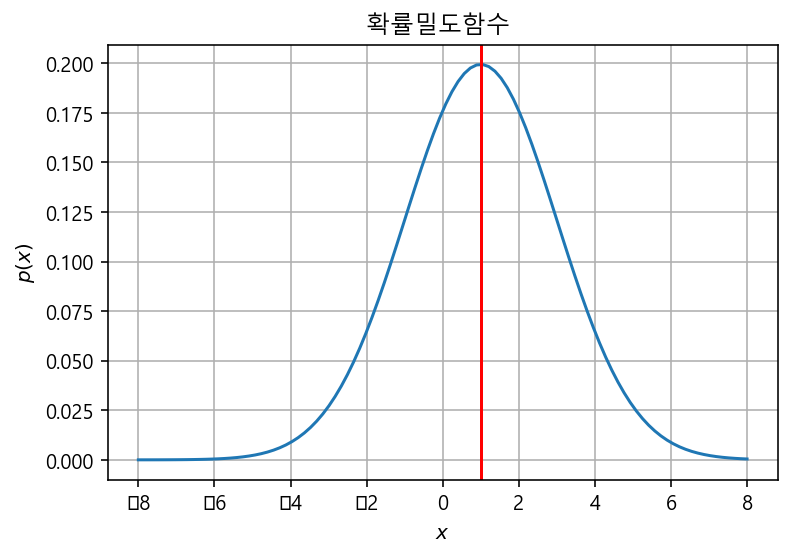

In [141]:
xx = np.linspace(-8, 8, 100)
pdf = rv.pdf(xx)
plt.plot(xx, pdf)
plt.title("확률밀도함수 ")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.axvline(1, color='red')
plt.grid()
plt.show()

누적분포함수에서의 중앙값은 높이가 0.5가 되는 지점이다.

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


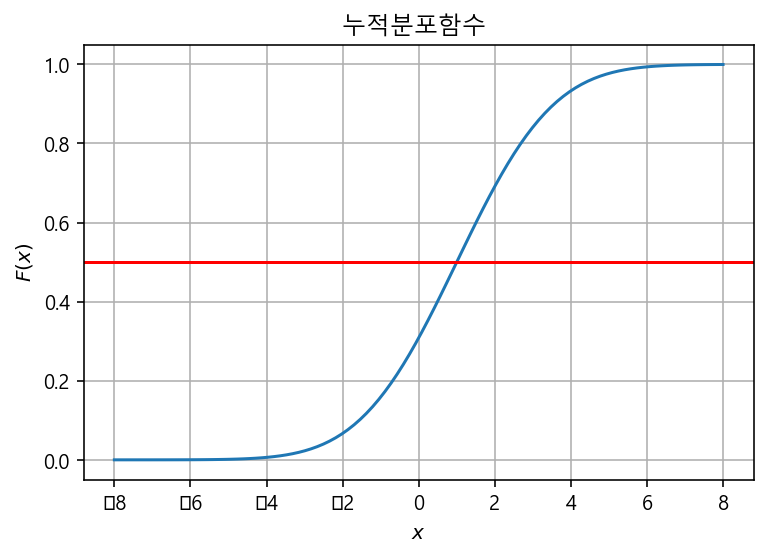

In [138]:
xx = np.linspace(-8, 8, 100)
cdf = rv.cdf(xx)
plt.plot(xx, cdf)
plt.title("누적분포함수 ")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.axhline(0.5, color='red')
plt.grid()
plt.show()

## 최빈값

이산확률분포의 최빈값은 확률이 가장 큰 수이다.

연속확률분포의 최빈값은 확률밀도함수 $px$의 값이 가장 큰 확률변수의 값이다.

즉, 확률밀도함수의 최댓값의 위치이다.

\begin{align}
\text{최빈값} = \arg \max_x p(x) 
\end{align}